<a href="https://colab.research.google.com/github/himal61559/PLSC667./blob/main/Sarima_model_and_LSTM_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Loading packages and dataframe

In [3]:
import pandas as pd

# Load the data
df = pd.read_csv('/content/drive/MyDrive/Final_bao/bao_final.csv',)

# Display the first few rows of the DataFrame to understand its structure
print(df.head())


     Date      NDVI   air_temp   Gage Precipitation (Daily)(in)  \
0  1/1/10  0.537070      34.82                             0.02   
1  1/2/10  0.504706      25.65                             0.00   
2  1/3/10  0.473818      22.59                             0.00   
3  1/4/10  0.444371      26.60                             0.00   
4  1/5/10  0.416334      27.88                             0.00   

    Mean Daily RH(%)   Mean Wind Speed(m/sec)   Mean Wind Direction(deg.)  \
0              76.29                     1.81                      307.18   
1              51.96                     5.43                      312.81   
2              54.65                     5.42                      303.22   
3              63.31                     3.33                      308.85   
4              58.42                     3.43                      310.59   

    Daily Avg ST(*C)   soil_temp  solar_radiation  
0               0.71      33.278      4851120.000  
1               0.30      32.5

In [4]:
df.dtypes

Date                                object
NDVI                               float64
 air_temp                          float64
 Gage Precipitation (Daily)(in)    float64
 Mean Daily RH(%)                  float64
 Mean Wind Speed(m/sec)            float64
 Mean Wind Direction(deg.)         float64
 Daily Avg ST(*C)                  float64
 soil_temp                         float64
solar_radiation                    float64
dtype: object

##converting date column into datatime

In [5]:
# Convert 'date' column to datetime and set as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Check for and handle missing values
df.fillna(method='ffill', inplace=True)  # forward fill as an example

# Print info to check data types and missing values
print(df.info())



<ipython-input-5-eb4feb45e0d6>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5155 entries, 2010-01-01 to 2024-04-06
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   NDVI                             5155 non-null   float64
 1    air_temp                        5155 non-null   float64
 2    Gage Precipitation (Daily)(in)  5155 non-null   float64
 3    Mean Daily RH(%)                5155 non-null   float64
 4    Mean Wind Speed(m/sec)          5155 non-null   float64
 5    Mean Wind Direction(deg.)       5155 non-null   float64
 6    Daily Avg ST(*C)                5155 non-null   float64
 7    soil_temp                       5155 non-null   float64
 8   solar_radiation                  5155 non-null   float64
dtypes: float64(9)
memory usage: 402.7 KB
None


In [6]:
df

,NDVI,air_temp,Gage Precipitation (Daily)(in),Mean Daily RH(%),Mean Wind Speed(m/sec),Mean Wind Direction(deg.),Daily Avg ST(*C),soil_temp,solar_radiation
Date,,,,,,,,,
2010-01-01,0.537070,34.82,0.02,76.29,1.81,307.18,0.71,33.278,4.851120e+06
2010-01-02,0.504706,25.65,0.00,51.96,5.43,312.81,0.30,32.540,8.124960e+06
2010-01-03,0.473818,22.59,0.00,54.65,5.42,303.22,-0.11,31.802,5.668260e+06
2010-01-04,0.444371,26.60,0.00,63.31,3.33,308.85,-0.31,31.442,3.897510e+06
2010-01-05,0.416334,27.88,0.00,58.42,3.43,310.59,-0.35,31.370,6.662520e+06
...,...,...,...,...,...,...,...,...,...
2024-04-02,0.521906,45.28,1.81,95.44,4.56,82.62,8.57,47.426,1.521765e+06
2024-04-03,0.524786,44.05,0.48,85.52,1.53,309.07,8.65,47.570,1.052939e+07
2024-04-04,0.527528,43.84,0.00,68.55,2.22,300.24,8.58,47.444,1.321709e+07


##plotting line graph for exploratory data analysis of NDVI

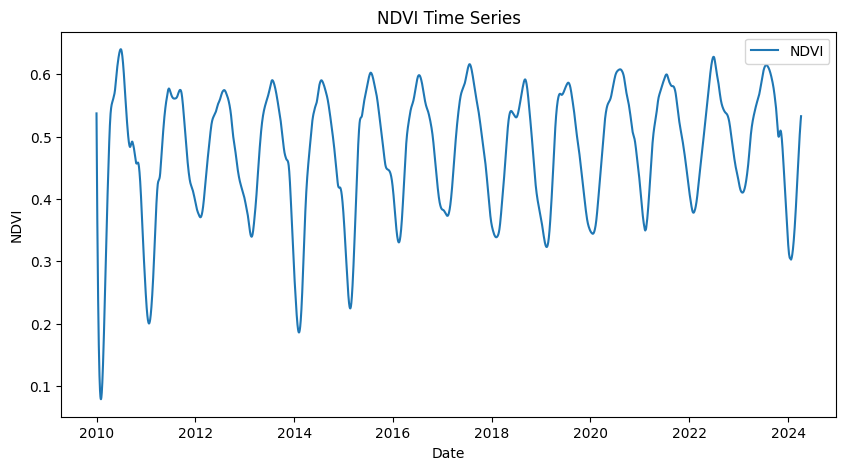

In [7]:
import matplotlib.pyplot as plt

# Plot NDVI
plt.figure(figsize=(10, 5))
plt.plot(df['NDVI'], label='NDVI')
plt.title('NDVI Time Series')
plt.xlabel('Date')
plt.ylabel('NDVI')
plt.legend()
plt.show()


## plotting autocorrelationa and partial autocorrelaton graph for figuring out hyperparameters of model

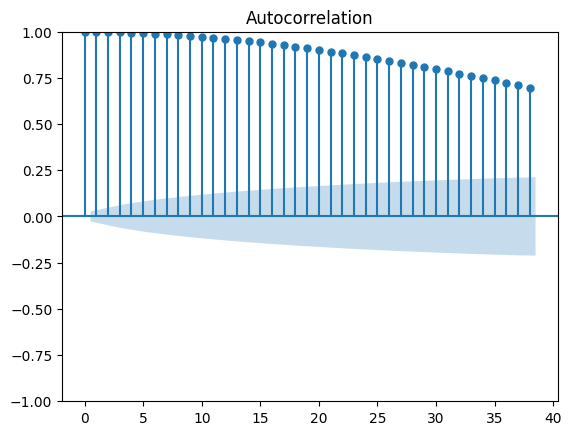

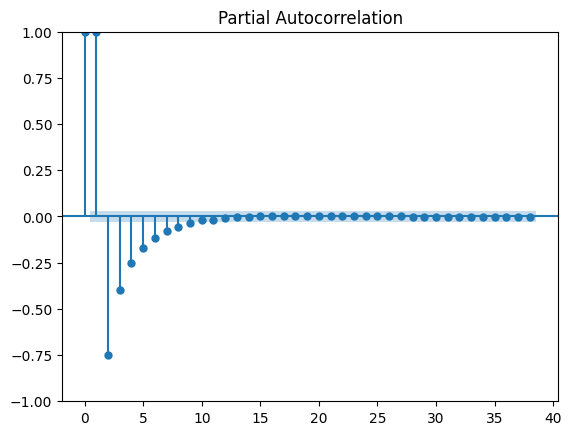

In [8]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
plot_acf(df['NDVI'])
plot_pacf(df['NDVI'])
plt.show()

##Test-train split

In [9]:
import pandas as pd

# Assume df is your full DataFrame and it has a datetime index
# Let's say we want to hold out the last 12 months of data for testing
train = df.iloc[:-1031]  # All data except the last 12 months
test = df.iloc[-1031:]   # Last 12 months for testing


In [10]:
train

,NDVI,air_temp,Gage Precipitation (Daily)(in),Mean Daily RH(%),Mean Wind Speed(m/sec),Mean Wind Direction(deg.),Daily Avg ST(*C),soil_temp,solar_radiation
Date,,,,,,,,,
2010-01-01,0.537070,34.82,0.02,76.29,1.81,307.18,0.71,33.278,4.851120e+06
2010-01-02,0.504706,25.65,0.00,51.96,5.43,312.81,0.30,32.540,8.124960e+06
2010-01-03,0.473818,22.59,0.00,54.65,5.42,303.22,-0.11,31.802,5.668260e+06
2010-01-04,0.444371,26.60,0.00,63.31,3.33,308.85,-0.31,31.442,3.897510e+06
2010-01-05,0.416334,27.88,0.00,58.42,3.43,310.59,-0.35,31.370,6.662520e+06
...,...,...,...,...,...,...,...,...,...
2021-05-25,0.567649,73.26,0.29,85.68,1.55,232.95,23.30,73.940,2.160685e+07
2021-05-26,0.568371,73.13,0.00,68.95,1.51,319.80,24.07,75.326,2.870661e+07
2021-05-27,0.569077,61.95,1.09,71.38,3.17,88.61,20.57,69.026,1.013598e+07


##Performed Augmented Dickey Fuller test for stationarity of dataset

In [11]:
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test
time_series = df['NDVI']
result = adfuller(time_series.dropna())  # Ensure there are no NaN values in the series
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))


ADF Statistic: -7.244218
p-value: 0.000000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


In [12]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.4 MB/s eta 0:00:00


## Running auto_arima to figure out hyperparameters

In [13]:
# Assuming 'NDVI' is the column we need to forecast
ndvi_series = df['NDVI']

from pmdarima import auto_arima
from pmdarima import auto_arima

# Finding the best SARIMA parameters
sarima_model = auto_arima(ndvi_series, seasonal=True, m=12, trace=True,
                          error_action='ignore', suppress_warnings=True,
                          stepwise=True)

print(sarima_model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=-63621.287, Time=33.69 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=-47108.842, Time=5.17 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=-62191.657, Time=18.89 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=-54637.170, Time=23.86 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=-47110.842, Time=1.08 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=-62264.068, Time=26.60 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=-63515.521, Time=27.13 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=-63287.387, Time=38.95 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=-63487.033, Time=45.67 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=-65116.607, Time=11.02 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=-64728.826, Time=12.37 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=-64576.971, Time=2.58 sec
 ARIMA(3,1,2)(0,0,0)[12] intercept   : AIC=-64926.532, Time=4.47 sec
 ARIMA(2,1,3)(0,0,0)[12] intercept   : AIC=-64906.3

## Fitting SARIMA model

In [14]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# SARIMA Model
model = SARIMAX(train['NDVI'], order=(2,1,2), seasonal_order=(0,0,0,12))
results = model.fit()

# Summary of the model
print(results.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                   NDVI   No. Observations:                 4124
Model:               SARIMAX(2, 1, 2)   Log Likelihood               25687.610
Date:                Fri, 17 May 2024   AIC                         -51365.219
Time:                        22:12:13   BIC                         -51333.598
Sample:                             0   HQIC                        -51354.027
                               - 4124                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.7886      0.001   2813.193      0.000       1.787       1.790
ar.L2         -0.7908      0.001  -1267.325      0.000      -0.792      -0.790
ma.L1         -1.2772      0.001  -1741.895      0.0

##Forecasting NDVI

In [15]:
# Forecast
forecast = results.get_forecast(steps=1031)  # Adjust steps according to needed forecast length
forecast_df = forecast.conf_int()
forecast_df['mean'] = forecast.predicted_mean

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [16]:
import pandas as pd

# Suppose the last date in your observed data is '2021-05-29'
last_obs_date = pd.to_datetime('2021-05-29')

# Generate a date range for the forecast period
# Assuming monthly forecasts for the next 12 months
forecast_dates = pd.date_range(start=last_obs_date + pd.DateOffset(days=1), periods=1031, freq='D')

# Assuming 'forecast_df' is your DataFrame with forecasted values but without a date index
forecast_df['Date'] = forecast_dates

# Set the new date column as the index of the DataFrame
forecast_df.set_index('Date', inplace=True)

# Now 'forecast_df' has the dates as its index, matching each forecasted value to a date

In [17]:
forecast_df

,lower NDVI,upper NDVI,mean
Date,,,
2021-05-30,0.570220,0.572067,0.571144
2021-05-31,0.570128,0.573483,0.571806
2021-06-01,0.569914,0.575001,0.572457
2021-06-02,0.569567,0.576632,0.573100
2021-06-03,0.569093,0.578372,0.573733
...,...,...,...
2024-03-21,-1.245979,2.508504,0.631262
2024-03-22,-1.247036,2.509561,0.631262
2024-03-23,-1.248092,2.510617,0.631262


##Plotting observed and forecast data

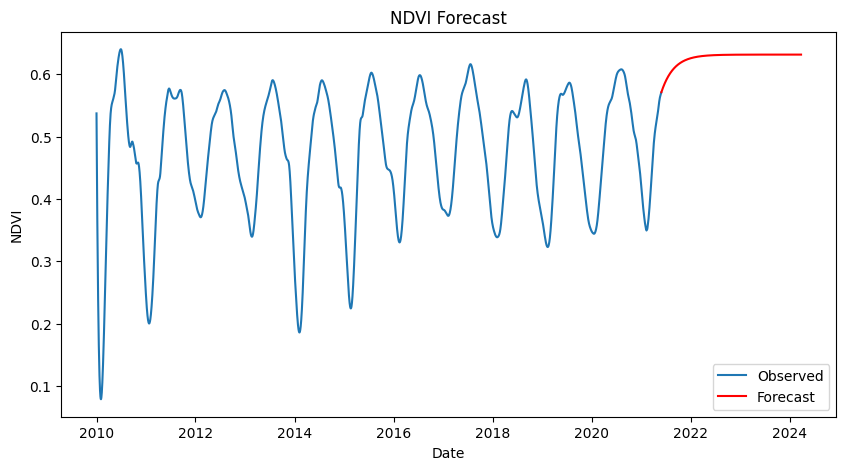

In [18]:
# Plot forecast
plt.figure(figsize=(10, 5))
plt.plot(train['NDVI'], label='Observed')
plt.plot(forecast_df['mean'], label='Forecast', color='r')
#plt.fill_between(forecast_df.index, forecast_df.iloc[:, 0], forecast_df.iloc[:, 1], color='pink')
plt.title('NDVI Forecast')
plt.xlabel('Date')
plt.ylabel('NDVI')
plt.legend()
plt.show()

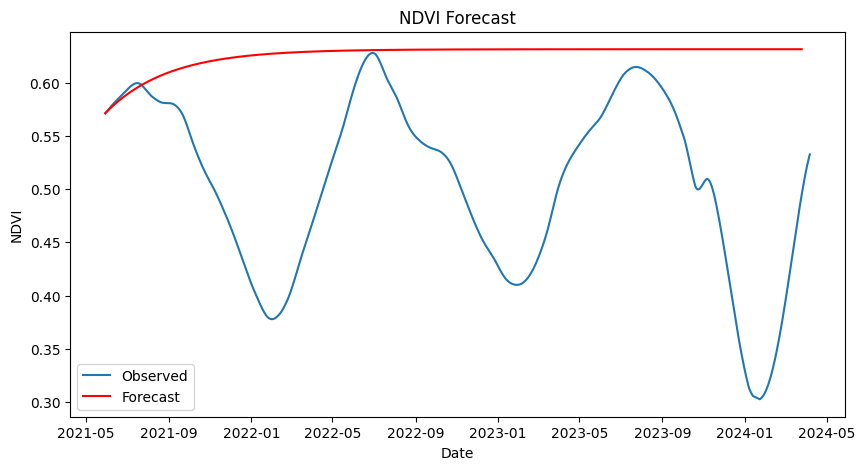

In [19]:
# Plot forecast
plt.figure(figsize=(10, 5))
plt.plot(test['NDVI'], label='Observed')
plt.plot(forecast_df['mean'], label='Forecast', color='r')
#plt.fill_between(forecast_df.index, forecast_df.iloc[:, 0], forecast_df.iloc[:, 1], color='pink')
plt.title('NDVI Forecast')
plt.xlabel('Date')
plt.ylabel('NDVI')
plt.legend()
plt.show()

In [20]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Sample Data: Replace these with your actual and forecasted dataframes
# Let's assume 'actual' and 'forecasted' are pandas Series with the observed and predicted NDVI values.
actual = pd.Series(df['NDVI'].values)
forecasted = pd.Series(forecast_df['mean'].values)

## Model evaluation metrices calculation

In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from numpy import sqrt
from sklearn.metrics import r2_score

mae = mean_absolute_error(test['NDVI'], forecast_df['mean'])
mse = mean_squared_error(test['NDVI'], forecast_df['mean'])
rmse = sqrt(mse)
r2 = r2_score(test['NDVI'], forecast_df['mean'])
print('R^2:', r2)


print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)



R^2: -2.2482044816348927
Mean Absolute Error: 0.12008307722431431
Mean Squared Error: 0.021732261266151548
Root Mean Squared Error: 0.14741865983026553


In [22]:
print("AIC:", results.aic)


AIC: -51365.219298514174


##LSTM model

##Importing packages, normalization, train test splitting

In [23]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
#df = pd.read_csv('path_to_bao_final.csv')  # Update the path to where you stored 'bao_final.csv'
#df['date'] = pd.to_datetime(df['date'])
#df.set_index('date', inplace=True)

# We will use NDVI values, assuming 'NDVI' is the column name
ndvi_series = df['NDVI'].values

# Normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
ndvi_series_scaled = scaler.fit_transform(ndvi_series.reshape(-1, 1))

# Split into training and test sets
split_percent = 0.80
split = int(split_percent*len(ndvi_series_scaled))
ndvi_train = ndvi_series_scaled[:split]
ndvi_test = ndvi_series_scaled[split:]

# Convert an array of values into a dataset matrix
def to_supervised(data, n_input, n_output=1):
    X, y = [], []
    for i in range(len(data) - n_input - n_output + 1):
        X.append(data[i:(i+n_input), 0])
        y.append(data[(i+n_input):(i+n_input+n_output), 0])
    return np.array(X), np.array(y)

n_input = 3
n_output = 1
X_train, y_train = to_supervised(ndvi_train, n_input, n_output)
X_test, y_test = to_supervised(ndvi_test, n_input, n_output)

# Reshape input to be [samples, time steps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


## Fit model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Build the LSTM model
model = Sequential()
model.add(LSTM(30, activation='relu', input_shape=(n_input, 1), dropout=0.1, recurrent_dropout=0.2))
model.add(Dense(n_output))
model.compile(optimizer='adam', loss='mse')

# Summary of the LSTM model
model.summary()


In [ ]:
# Fit the model
model.fit(X_train, y_train, epochs=45, batch_size=72, validation_data=(X_test, y_test), verbose=2, shuffle=False)


In [ ]:
# Make predictions
predictions = model.predict(X_test)

# Invert scaling to go back to original scale
predictions = scaler.inverse_transform(predictions)
actuals = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate RMSE or other performance metrics
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(actuals, predictions))
print('Test RMSE: %.3f' % rmse)


## Plotting actual and predicted values

In [ ]:
import matplotlib.pyplot as plt

# Plot actual vs predicted values
plt.plot(actuals, label='Actual NDVI')
plt.plot(predictions, label='Predicted NDVI', alpha=0.7)
plt.title('NDVI Forecast')
plt.xlabel('Time')
plt.ylabel('NDVI')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt


## Calculating model performance metrices

In [ ]:
# Assuming 'predictions' and 'actuals' are your model's output and true values, respectively

# Calculate MSE
mse = mean_squared_error(actuals, predictions)

# Calculate RMSE
rmse = sqrt(mse)

# Calculate MAE
mae = mean_absolute_error(actuals, predictions)

# Calculate R² Score
r2 = r2_score(actuals, predictions)

# Print the metrics
print(f'Mean Squared Error (MSE): {mse:.3f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.3f}')
print(f'Mean Absolute Error (MAE): {mae:.3f}')
print(f'R-squared (R²): {r2:.3f}')
